# Image Classification with DNN

## DATASETS:
(a) Carbonic Anhydrase II (ChEMBL205), a protein lyase,  
(b) Cyclin-dependent kinase 2 (CHEMBL301), a protein kinase,  
(c) ether-a-go-go-related gene potassium channel 1 (HERG) (CHEMBL240), a voltage-gated ion channel,  
(d) Dopamine D4 receptor (CHEMBL219), a monoamine GPCR,  
(e) Coagulation factor X (CHEMBL244), a serine protease,  
(f) Cannabinoid CB1 receptor (CHEMBL218), a lipid-like GPCR and  
(g) Cytochrome P450 19A1 (CHEMBL1978), a cytochrome P450.  
The activity classes were selected based on data availability and as representatives of therapeutically important target classes or as anti-targets.

In [1]:
!nvidia-smi

Wed Mar 16 15:00:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
|  0%   57C    P8    17W / 240W |    409MiB /  8116MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#%%capture
#!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
#!chmod +x Miniconda3-latest-Linux-x86_64.sh
#!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
#!time conda install -q -y -c conda-forge rdkit

In [3]:
# Import
import pandas as pd
import numpy as np
from pathlib import Path

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')
from rdkit import Chem
from rdkit.Chem import AllChem

RDKit WARNING: [15:00:07] Enabling RDKit 2019.09.3 jupyter extensions


In [5]:
dataset = 'CHEMBL205_cl'

In [6]:
path = Path('../dataset/13321_2017_226_MOESM1_ESM/')
df = pd.read_csv(path/f'{dataset}_ecfp_1024.csv')

In [7]:
list(path.iterdir())

[PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL1978_cl_ecfp_1024.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL205_cl-data-with-ecfp-activations.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL244_cl_ecfp_512.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL218_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/RdkitDescriptors.py'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL205_cl_ecfp_512.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL301_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL205_cl_ecfp_1024.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL1978_cl_ecfp_512.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL240_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL301_cl_ecfp_512.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL218_cl_ecfp_1024.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL301_cl_ecfp_1024.cs

In [8]:
DATA = path/'mol_images'

In [9]:
IMAGES = DATA/dataset

# Create train validation split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_valid = train_test_split(df.index, test_size=0.2, random_state=666, stratify=df['Activity'])
df.loc[x_train, 'is_valid']=False
df.loc[x_valid, 'is_valid']=True

In [12]:
df.is_valid.value_counts()

False    14352
True      3589
Name: is_valid, dtype: int64

# Create dataloader

In [13]:
from fastai.vision.all import *

In [14]:
df['Image'] = df['CID'] + '.png'
df.head()

,CID,SMILES,ECFP4_1,ECFP4_2,ECFP4_3,ECFP4_4,ECFP4_5,ECFP4_6,ECFP4_7,ECFP4_8,...,ECFP4_1018,ECFP4_1019,ECFP4_1020,ECFP4_1021,ECFP4_1022,ECFP4_1023,ECFP4_1024,Activity,is_valid,Image
0,CHEMBL188002,S(=O)(=O)(N)c1cc(N/C(/S)=N\c2cc(C(=O)[O-])c(cc2)C=2c3c(OC4=CC(=O)C=CC=24)cc(O)cc3)ccc1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,False,CHEMBL188002.png
1,CHEMBL364127,Clc1ccc(cc1)C(=O)NC1Cc2cc(S(=O)(=O)N)ccc2C1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,False,CHEMBL364127.png
2,CHEMBL1683469,S(=O)(=O)(N)c1ccc(cc1)CNS(=O)(=O)CC12CCC(CC1=O)C2(C)C,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,False,CHEMBL1683469.png
3,CHEMBL52564,Oc1ccccc1\C=C\C(=O)[O-],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,False,CHEMBL52564.png
4,CHEMBL21427,OB(O)c1ccc(OC)cc1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,False,CHEMBL21427.png


In [15]:
images = df['CID'] + ".png"
images.head()

0     CHEMBL188002.png
1     CHEMBL364127.png
2    CHEMBL1683469.png
3      CHEMBL52564.png
4      CHEMBL21427.png
Name: CID, dtype: object

In [16]:
# No flips, some rotation and zoom. Normalize to imagenet_stats as
# we're using pretrained models.
batch_tfms = [*aug_transforms(mult=1.0, do_flip=False, flip_vert=False, 
               max_rotate=20.0, min_zoom=1.0, max_zoom=1.1, max_lighting=0., 
               max_warp=0., p_affine=0.75, p_lighting=0.75, xtra_tfms=None, 
               size=224, mode='bilinear', 
               pad_mode='border', align_corners=True, 
               batch=False, min_scale=1.0), 
              Normalize.from_stats(*imagenet_stats)]

In [17]:
db = DataBlock(
    blocks = (ImageBlock(), CategoryBlock()), 
    get_x=ColReader('Image', pref=IMAGES),
    get_y=ColReader('Activity'), 
    splitter=ColSplitter('is_valid'),
    item_tfms=None, 
    batch_tfms=None,
    )

Oversmaple instead of using class weights to test custom loss function

In [18]:
def val_cols_and_oversample(df, test_size=0.25, random_state=42, oversample=True):
    x_train,x_val = train_test_split(df.index, test_size=test_size, stratify=df['Activity'], 
                                     random_state=random_state)
    
    df.loc[x_train, 'is_valid']=False
    df.loc[x_val, 'is_valid']=True
    # Oversample is_valid=False columns
    if oversample:
        df = pd.concat([*[df.loc[(df.is_valid==False) & (df.Activity==1)]]*10, 
                        *[df.loc[(df.is_valid==False) & (df.Activity==0)]], 
                        df.loc[df.is_valid==True]], 
                       ignore_index=True)
    return df


In [19]:
def get_df(dataset, random_state=42, test_size=0.25, oversample=True):
    df = pd.read_csv(path/f'{dataset}.csv')
    df = val_cols_and_oversample(df, test_size=test_size, random_state=random_state, oversample=oversample)
    df['Image'] = df['CID'] + '.png'
    return df

In [20]:
def get_df_with_clusters(dataset, n_clusters=100, random_state=42, test_size=0.25):
    df = pd.read_csv(path/f'{dataset}_ECFP_1024_with_{n_clusters}_clusters.csv')
    values = df.Cluster.value_counts(ascending=True)
    values = values[values < 2].index
    for i in list(values):
        df = df.drop(df[df.Cluster == i].index)
    df.reset_index(drop=True, inplace=True)
    x_train, x_valid = train_test_split(df.index, test_size=test_size, random_state=random_state, stratify=df['Cluster'])
    df.loc[x_train, 'is_valid']=False
    df.loc[x_valid, 'is_valid']=True
    df['Image'] = df['Name'] + '.png'
    return df

In [21]:
df = get_df(dataset)
df.head()

,CID,SMILES,Activity,is_valid,Image
0,CHEMBL364127,Clc1ccc(cc1)C(=O)NC1Cc2cc(S(=O)(=O)N)ccc2C1,1,False,CHEMBL364127.png
1,CHEMBL1683469,S(=O)(=O)(N)c1ccc(cc1)CNS(=O)(=O)CC12CCC(CC1=O)C2(C)C,1,False,CHEMBL1683469.png
2,CHEMBL52564,Oc1ccccc1\C=C\C(=O)[O-],1,False,CHEMBL52564.png
3,CHEMBL21427,OB(O)c1ccc(OC)cc1,1,False,CHEMBL21427.png
4,CHEMBL1414,O(C)c1cc(cc(OC)c1O)C(=O)[O-],1,False,CHEMBL1414.png


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28948 entries, 0 to 28947
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CID       28948 non-null  object
 1   SMILES    28948 non-null  object
 2   Activity  28948 non-null  int64 
 3   is_valid  28948 non-null  object
 4   Image     28948 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [23]:
IMAGES = DATA/dataset
IMAGES

Path('../dataset/13321_2017_226_MOESM1_ESM/mol_images/CHEMBL205_cl')

In [24]:
def get_dls(dataset, bs=64, clustering=False, random_state=42):
    IMAGES = DATA/dataset
    if clustering:
        df = get_df_with_clusters(dataset, n_clusters=100)
    else: 
        df = get_df(dataset, oversample=True)
    db = DataBlock(
        blocks = (ImageBlock(), CategoryBlock()), 
        get_x=ColReader('Image', pref=IMAGES),
        get_y=ColReader('Activity'), 
        splitter=ColSplitter('is_valid'),
        item_tfms=None, 
        batch_tfms=None,
        )
    dls = db.dataloaders(df, bs=bs, shuffle_train=True, random_state=42)
    return dls, df

In [25]:
dls, df = get_dls(dataset, clustering=False)

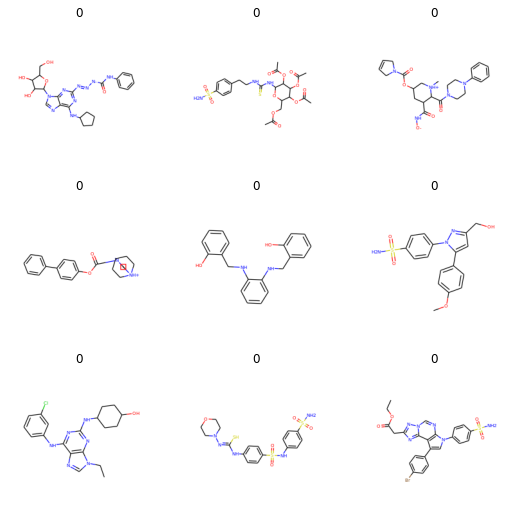

In [26]:
dls.show_batch()

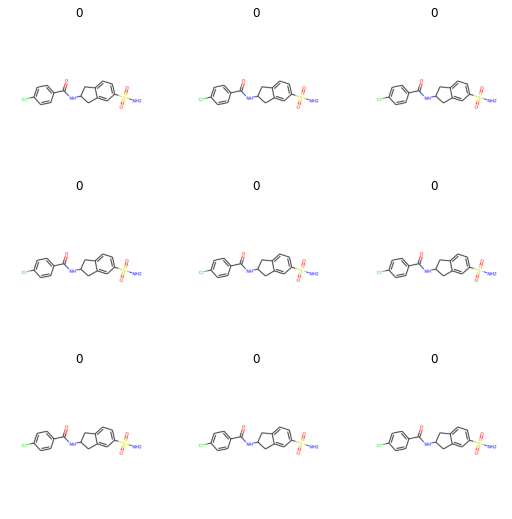

In [27]:
dls.show_batch(unique=True)

# Create class weights

In [28]:
TARGET = 'Activity'

In [29]:
train_df = df[df.is_valid == False]

In [30]:
class_count_df = train_df.groupby(TARGET).count()
class_count_df

,CID,SMILES,is_valid,Image
Activity,,,,
0,12232,12232,12232,12232
1,12230,12230,12230,12230


In [31]:
n_0, n_1 = class_count_df.iloc[0, 0], class_count_df.iloc[1, 0]

In [32]:
w_0 = (n_0 + n_1) / (2.0 * n_0)
w_1 = (n_0 + n_1) / (2.0 * n_1)
w_0, w_1

(0.9999182472204055, 1.0000817661488144)

In [33]:
class_weights=torch.FloatTensor([w_0, w_1]).cuda()

In [34]:
loss_func = CrossEntropyLossFlat(weight=class_weights)

In [35]:
def get_loss_func(df):
    TARGET = 'Activity'
    class_count_df = df.groupby(TARGET).count()
    n_0, n_1 = class_count_df.iloc[0, 0], class_count_df.iloc[1, 0]
    w_0 = (n_0 + n_1) / (2.0 * n_0)
    w_1 = (n_0 + n_1) / (2.0 * n_1)
    class_weights=torch.FloatTensor([w_0, w_1]).cuda()
    loss_func = CrossEntropyLossFlat(weight=class_weights)
    return loss_func

In [36]:
loss_func=get_loss_func(df)

# Train CNN model

In [37]:
from sklearn.metrics import auc,roc_auc_score,recall_score,precision_score,f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns
from utils.losses import * 

In [38]:
from fastai.callback.hook import *

In [39]:
def train_model(dls, arch=resnet18, loss_func=None, metric = None, epochs=16, wd=None, lr=None):
    
    
    print(f'Architechture: {arch}')
    #print(f'Untrained epochs: freeze_epochs={freeze_epochs}')
    print(f'Trained epochs: epochs={epochs}')
    print(f'Weight decay: wd={wd}')
    if metric == None: 
        learn = cnn_learner(dls, arch=arch, pretrained=True, 
                            wd=wd,
                            loss_func=loss_func,
                            metrics=[accuracy, 
                            F1Score(), 
                            Precision(), 
                            Recall(), 
                            RocAucBinary(), 
                            MatthewsCorrCoef()])
    else: 
        learn = cnn_learner(dls, arch=arch, pretrained=True, 
                                wd=wd,
                                loss_func=loss_func,
                                metrics=[accuracy, 
                                F1Score(), 
                                Precision(), 
                                Recall(), 
                                RocAucBinary(), 
                                MatthewsCorrCoef(), 
                                metric])
    
    if lr == None: 
        print(f'Finding learning rate...')
        lr_min, lr_steep = learn.lr_find(suggestions=True, show_plot=False)
        print(f'Training model with learning rate: {lr_min}')
        lr = lr_min
    else: 
        print(f'Training model with learning rate: {lr}')
    learn.fine_tune(epochs, lr)
    
    return learn

In [76]:
# Train model on resnet18
learn = train_model(dls,loss_func=None, epochs=5, lr=3e-3, wd=0.0002)

Architechture: <function resnet18 at 0x7fc1f8e94048>
Trained epochs: epochs=5
Weight decay: wd=0.0002
Training model with learning rate: 0.003


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.258442,0.220403,0.921311,0.674654,0.540620,0.897059,0.966739,0.659309,00:55


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.091518,0.231327,0.930896,0.710280,0.574018,0.931373,0.974203,0.699012,01:11
1,0.073995,0.121324,0.965448,0.825254,0.764092,0.897059,0.980351,0.809414,01:11


KeyboardInterrupt: 

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(k=50)

# Test for metric with cost

In [ ]:
cost = [100, 1]

In [ ]:
n_0, n_1 = class_count_df.iloc[0, 0], class_count_df.iloc[1, 0]

In [ ]:
w_0 = (n_0 + n_1) / (2.0 * n_0)
w_1 = (n_0 + n_1) / (2.0 * n_1)
w_0 = w_0 * cost[0]
w_1 = w_1 * cost[1]
w_0, w_1

In [ ]:
class_weights=torch.FloatTensor([w_0, w_1]).cuda()

In [ ]:
decision_loss = nn.CrossEntropyLoss(weight=class_weights)
type(decision_loss)

In [ ]:
type(F1Score())

In [ ]:
# Train model on resnet18
learn = train_model(dls,loss_func=loss_func, metric=decision_loss, epochs=1, lr=3e-3, wd=0.002)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(k=5)

# Cost-sensitive loss function



There's a simple idea behind a Cost-Sensitive Loss: we impose a different penalty to different kind of errors. For illustration purposes, imagine you have a three-class classification problem and you wish to impose a greater penalty to errors in misclassifying class 2 as class 0, but you don't care about the other errors.*

In [55]:
import torch
from torch import nn
import torch.nn.functional as F

In [ ]:
n_classes = 2

In [ ]:
cs_loss = CostSensitiveLoss(n_classes, normalization='sigmoid')

In [ ]:
print(cs_loss.M)

In [ ]:
M = np.array([[0,10],
              [1,0]], dtype=float)
M /= M.max()
M = torch.from_numpy(M)
M = M.to(torch.float32)
cs_loss.M = M


In [ ]:
print(cs_loss.M)

In [ ]:
# Train model on resnet18
learn = train_model(dls,loss_func=cs_loss, metric=cs_loss, epochs=1, lr=3e-3, wd=0.002)

In [ ]:
show_confusion_matrix(learn, dls)

**Results**: Just training for 1 epoch, number of False Positives went down, number of False Negatives went up (as expected), but number of True positives also went up which is bad. 

# Regularized cost-sensitive loss function

In our experiments (and elsewhere) we found out that simply using a CS loss leads to lots of trouble in terms of CNNs staying at local minima where they will predict a trivial configuration (all the time the same category), which seems to be very satisfying for this kind of losses. For this reason, we recommend using this as a regularizer for other standard classification losses (just a weighted sum of both, with a weighing parameter `lambd`). \
In our implementation we provide a wrapper for doing this, where you specify a `base_loss` and the regularization parameter `lambd`:


In [ ]:
n_classes = 2 
base_loss = 'ce'
lambd = 10
cs_regularized_loss = CostSensitiveRegularizedLoss(n_classes=n_classes, base_loss=base_loss, lambd=lambd)

In [ ]:
print(cs_regularized_loss.M)

In [ ]:
M = np.array([[0,10],
              [1,0]], dtype=float)
M /= M.max()
M = torch.from_numpy(M)
M = M.to(torch.float32)
cs_regularized_loss.M = M

In [ ]:
print(cs_regularized_loss.M)

In [ ]:
# Train model on resnet18
learn = train_model(dls,loss_func=cs_regularized_loss, metric=cs_regularized_criterion, epochs=1, lr=3e-3, wd=0.002)

In [ ]:
preds, y = learn.get_preds(dl=dls.valid)

In [ ]:
preds

In [54]:
def show_confusion_matrix(learn, dl):
    preds, y = learn.get_preds(dl=dl)
    pred = preds.argmax(axis=1)
    cm = confusion_matrix(y, pred)
    f = sns.heatmap(cm, annot=True, fmt='d')
    plt.show()
    return f

In [ ]:
show_confusion_matrix(learn, dls.valid)

**Results**:  False positives went drastically down, and true positives up compared to just using cost-sensitive loss, precision is higher then using regular cross entropy loss so could be a bit random. 

### Train for 10 epochs: 

In [ ]:
learn = train_model(dls,loss_func=cs_regularized_loss, metric=cs_regularized_criterion, epochs=10, lr=3e-3, wd=0.002)

In [ ]:
show_confusion_matrix (learn, dls)

# Compare regularized cost-sensitive loss functions

In [41]:
from utils.losses import *

In [42]:
from fastai.losses import FocalLossFlat as focal_loss

In [43]:
from kornia.losses import FocalLoss as focal_loss

In [44]:
focal_loss

kornia.losses.focal.FocalLoss

Compare: Cross entropy (CE), CE with Label Smoothing (LS), CE with Gaussian LS

In [57]:
losses = ['ce', 'focal_loss', 'ls', 'gls']

In [77]:
M = np.array([[0,20],
            [1,0]], dtype=float)
M /= M.max()
M = torch.from_numpy(M)
M = M.to(torch.float32)

In [78]:
def train_model_with_loss(base_loss='ce', n_classes = 2, lambd = 10):
    loss = CostSensitiveRegularizedLoss(n_classes=n_classes, base_loss=base_loss, lambd=lambd)
    loss.M = M
    learn = train_model(dls,loss_func=loss, epochs=5, lr=3e-3, wd=0.002)
    cm = show_confusion_matrix(learn, dls.valid)
    return learn, cm

Training model with base loss function ce and lambd: 10
Architechture: <function resnet18 at 0x7fc1f8e94048>
Trained epochs: epochs=3
Weight decay: wd=0.002
Training model with learning rate: 0.003


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.722064,0.730616,0.944940,0.738624,0.649907,0.855392,0.968734,0.716849,00:53


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.317948,0.333684,0.966117,0.808081,0.833333,0.784314,0.973067,0.789954,01:08
1,0.123659,0.332771,0.972804,0.850490,0.850490,0.850490,0.979180,0.835532,01:09
2,0.026501,0.335354,0.970129,0.830808,0.856771,0.806373,0.978608,0.814893,01:08


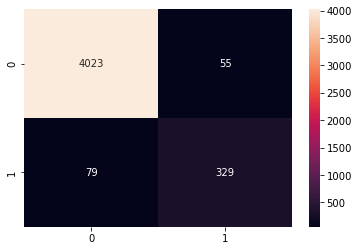

Training model with base loss function focal_loss and lambd: 10
Architechture: <function resnet18 at 0x7fc1f8e94048>
Trained epochs: epochs=3
Weight decay: wd=0.002
Training model with learning rate: 0.003


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.597671,0.383269,0.956309,0.760391,0.758537,0.762255,0.966817,0.736357,00:54


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.252287,0.371452,0.967677,0.833525,0.784017,0.889706,0.979486,0.817705,01:08
1,0.123109,0.235968,0.969683,0.831266,0.841709,0.821078,0.978070,0.814690,01:08
2,0.037280,0.219545,0.969461,0.825921,0.857520,0.796569,0.979085,0.809869,01:08


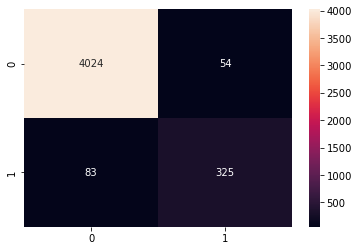

Training model with base loss function ls and lambd: 10
Architechture: <function resnet18 at 0x7fc1f8e94048>
Trained epochs: epochs=3
Weight decay: wd=0.002
Training model with learning rate: 0.003


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.948682,0.882807,0.953634,0.762557,0.713675,0.818627,0.969196,0.739129,00:54


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.564367,0.736127,0.967454,0.833713,0.778723,0.897059,0.980719,0.818283,01:09
1,0.403360,0.531697,0.969015,0.820645,0.866485,0.779412,0.973551,0.805090,01:09
2,0.312934,0.513372,0.968569,0.813245,0.884726,0.752451,0.976639,0.799320,01:09


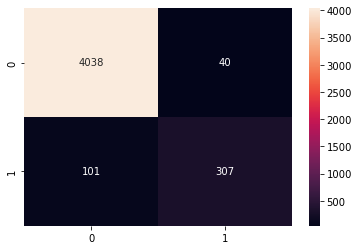

Training model with base loss function gls and lambd: 2
Architechture: <function resnet18 at 0x7fc1f8e94048>
Trained epochs: epochs=3
Weight decay: wd=0.002
Training model with learning rate: 0.003


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,1.072009,0.760699,0.912617,0.092593,0.833333,0.049020,0.931819,0.189354,00:54


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.954583,0.699436,0.909942,0.019417,1.000000,0.009804,0.968814,0.094447,01:10
1,0.910276,0.693521,0.909050,0.009709,0.500000,0.004902,0.973130,0.042499,01:11
2,0.879522,0.689267,0.909273,0.004890,1.000000,0.002451,0.976416,0.047208,01:10


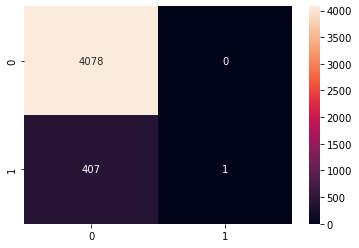

In [62]:
lambd = 2
for l in losses:
    if l == 'gls':
        lambd = 2
    print(f'Training model with base loss function {l} and lambd: {lambd}')
    base_loss = l
    train_model_with_loss(base_loss=base_loss, lambd=lambd)

# Test different lambdas

Lamdas is used to choose how much you will weight the cost-sensitive loss functions vs cross-entropy

In [79]:
lambdas = [0, 0.1, 1, 10]

Architechture: <function resnet18 at 0x7fc1f8e94048>
Trained epochs: epochs=5
Weight decay: wd=0.002
Training model with learning rate: 0.003


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.236184,0.263018,0.913732,0.659631,0.514403,0.919118,0.965730,0.648716,00:55


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.100420,0.152371,0.958761,0.801289,0.713193,0.914216,0.978474,0.786149,01:11
1,0.062133,0.121692,0.969015,0.837806,0.799555,0.879902,0.979461,0.821871,01:11
2,0.030427,0.140351,0.969461,0.829814,0.841310,0.818627,0.972364,0.813134,01:11
3,0.009808,0.137183,0.973027,0.852259,0.849148,0.855392,0.980870,0.837425,01:12
4,0.002761,0.154817,0.971690,0.847172,0.832151,0.862745,0.980349,0.831742,01:11


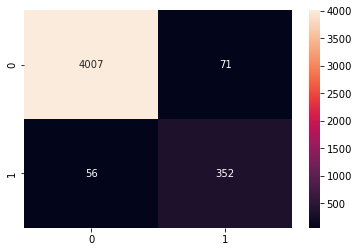

Architechture: <function resnet18 at 0x7fc1f8e94048>
Trained epochs: epochs=5
Weight decay: wd=0.002
Training model with learning rate: 0.003


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.234278,0.236588,0.927329,0.691288,0.563272,0.894608,0.959992,0.674961,00:57


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.105292,0.171647,0.959206,0.799122,0.723658,0.892157,0.977660,0.781966,01:12
1,0.089799,0.109818,0.966340,0.816525,0.809639,0.823529,0.978754,0.798031,01:12
2,0.029933,0.136017,0.969906,0.847458,0.786164,0.919118,0.984462,0.833998,01:12
3,0.011437,0.157784,0.969683,0.837709,0.816279,0.860294,0.980174,0.821346,01:12
4,0.003219,0.161533,0.971467,0.844282,0.838164,0.850490,0.980546,0.828604,01:12


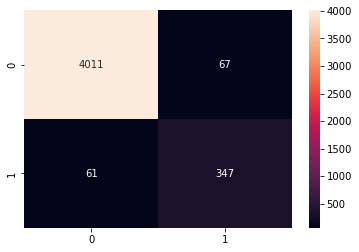

Architechture: <function resnet18 at 0x7fc1f8e94048>
Trained epochs: epochs=5
Weight decay: wd=0.002
Training model with learning rate: 0.003


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.313448,0.322936,0.924209,0.680451,0.551829,0.887255,0.965370,0.663354,00:58


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.132546,0.133837,0.965002,0.812872,0.791183,0.835784,0.981503,0.793947,01:12
1,0.090614,0.165744,0.967231,0.837927,0.761523,0.931373,0.983404,0.825048,01:12
2,0.041271,0.161508,0.970575,0.841346,0.825472,0.857843,0.984595,0.825322,01:12
3,0.008176,0.171525,0.971690,0.847904,0.829040,0.867647,0.985229,0.832567,01:13
4,0.002645,0.181442,0.972804,0.852300,0.842105,0.862745,0.985889,0.837400,01:12


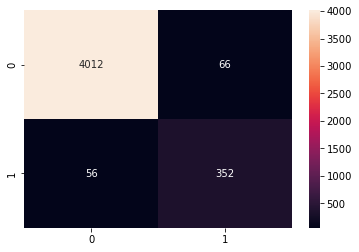

Architechture: <function resnet18 at 0x7fc1f8e94048>
Trained epochs: epochs=5
Weight decay: wd=0.002
Training model with learning rate: 0.003


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.716207,0.614114,0.950736,0.755260,0.688889,0.835784,0.968484,0.732360,00:58


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.291051,0.470881,0.965671,0.825000,0.769068,0.889706,0.980861,0.808711,01:12
1,0.206793,0.427189,0.965002,0.815944,0.782022,0.852941,0.972123,0.797563,01:11
2,0.108472,0.299097,0.971913,0.844828,0.849010,0.840686,0.984267,0.829399,01:11
3,0.033047,0.315911,0.968346,0.814621,0.871508,0.764706,0.974221,0.799434,01:12
4,0.010139,0.337767,0.968792,0.820972,0.858289,0.786765,0.976480,0.804826,01:13


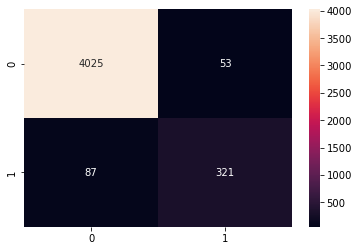

In [80]:
n_classes = 2
base_loss = 'ce'
for l in lambdas:
    train_model_with_loss(base_loss=base_loss, lambd=l)

Architechture: <function resnet18 at 0x7fc1f8e94048>
Trained epochs: epochs=5
Weight decay: wd=0.002
Training model with learning rate: 0.003


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.052247,0.036793,0.914623,0.655266,0.517781,0.892157,0.963966,0.639914,00:58


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.015987,0.021725,0.962996,0.809195,0.761905,0.862745,0.979010,0.790662,01:13
1,0.014145,0.018696,0.957869,0.800843,0.702403,0.931373,0.979171,0.787488,01:13
2,0.006975,0.020060,0.970352,0.841099,0.820513,0.862745,0.984120,0.825077,01:13
3,0.001979,0.024945,0.970352,0.842975,0.813212,0.875000,0.986944,0.827306,01:13
4,0.000379,0.027209,0.970352,0.842230,0.816092,0.870098,0.986726,0.826404,01:13


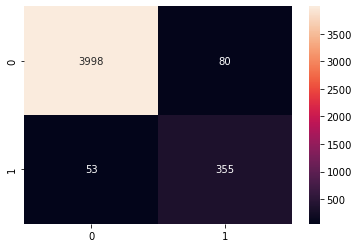

Architechture: <function resnet18 at 0x7fc1f8e94048>
Trained epochs: epochs=5
Weight decay: wd=0.002
Training model with learning rate: 0.003


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time


In [ ]:
n_classes = 2
base_loss = 'focal_loss'
for l in lambdas:
    train_model_with_loss(base_loss=base_loss, lambd=l)

In [ ]:
n_classes = 2
base_loss = 'ls'
for l in lambdas:
    train_model_with_loss(base_loss=base_loss, lambd=l)